# Introduction to Options and Option pricing using "quantsbin" library

## PART 3

In this last part of the tutorial we will explore on how to create, value and plot few standard option strategies and also how to build our own custom strategy.



Import **Quantsbin** the Derivative pricing module and assign qbdp as alias to it.

In [4]:
import quantsbin.derivativepricing as qbdp

### Defining Standard Strategies

We define Standard Strategies in Quantsbin using **StdStrategies** object.
Let's start with exploring doc string for StdStrategies

In [6]:
print(qbdp.StdStrategies.__doc__)


    The combined payoff, valuation and riskparameters are calculated for the Standard Strategies.
    This class inherits OptionStr1Udl class. so for valuation and riskparameters the market parameters are passed
    to the engine in similar fashion
        Args required:
            name = (String). Name of the std strategy e.g. "bull_call"
            asset = (String). Name of the asset class  e.g. "Stock"
            expiry_date = (Date in string format "YYYYMMDD") e.g. 10 Dec 2018 as "20181210"
            expiry_type = 'European' or 'American' (default is set to 'European')
            low_strike = (Float) Strike for option with lowest strike e.g. 110
            strike_spread = (Float). This is added or subtracted to strike based on the strategy e.g. 10
            time_spread = time added to expiry in to find expiry of long term maturity option in calendar spread.
    
    List of Std. Strategies [bull_call, bear_call, bull_put, bear_put, box_spread, butterfly_call, butterfly_pu

As we can observe above, to define a standard strategy we have option to choose from many inbuild strategies as listed under 'List of Std. Strategies'. We will start with defining a simple bull call strategy.

Bull Call spread is contructed using two Call options with different strike but all other parameters same.
We will be long Call at 50 and short call at 60.

In [11]:
std_stgy_bullcall = qbdp.StdStrategies(name='bull_call', asset='Stock', low_strike=50, strike_spread=10,
                                       expiry_date='20190721', expiry_type='European')


Let's check the payoff of this stratergy.

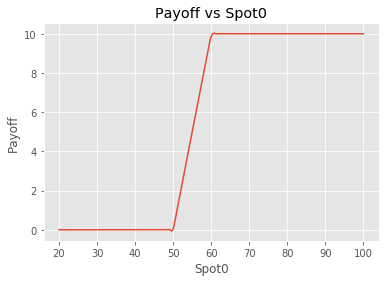

In [19]:
bull_call_payoff_plt = qbdp.Plotting(std_stgy_bullcall,'payoff', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_payoff_plt.show()

Here we can observe the payoff for the Bull Call sread. Now lets calculate the value of ths spread.

To calculate value of the spread we will start by defining engine similar to option objects.

In [17]:
std_stgy_bullcall_engine = std_stgy_bullcall.engine(model="BSM", spot0=55, pricing_date='20180531', volatility=.25,
                                 rf_rate=.05)
print("Value of Bull Call option strategy is {}".format(std_stgy_bullcall_engine.valuation()))
print("Greeks for Bull Call option strategy are {}".format(std_stgy_bullcall_engine.risk_parameters()))

Value of Bull Call option strategy is 5.037477575096734
Greeks for Bull Call option strategy are {'delta': 0.2509485886993118, 'gamma': -0.0059602583389659729, 'theta': 0.0003430025505126201, 'vega': -5.1372528039416316, 'rho': 9.9893507895890679, 'phi': -15.730695094356861}


As we have our engine defined lets plot PnL profile for our strategy

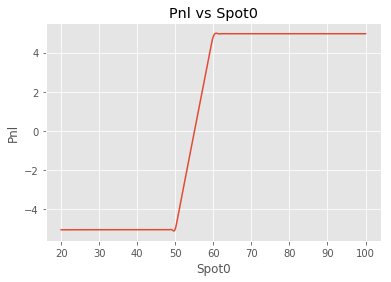

In [20]:
bull_call_pnl_plt = qbdp.Plotting(std_stgy_bullcall_engine,'pnl', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_pnl_plt.show()

Let's explore further into this strategy by plotting valuation and greeks.

**Valuation Profile**

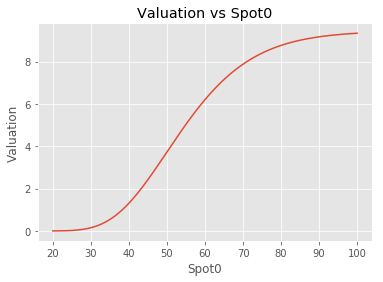

In [23]:
bull_call_val_plt = qbdp.Plotting(std_stgy_bullcall_engine,'valuation', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_val_plt.show()

**Greeks**

Delta

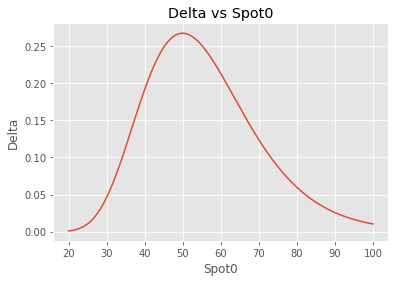

In [24]:
bull_call_delta_plt = qbdp.Plotting(std_stgy_bullcall_engine,'delta', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_delta_plt.show()

Gamma

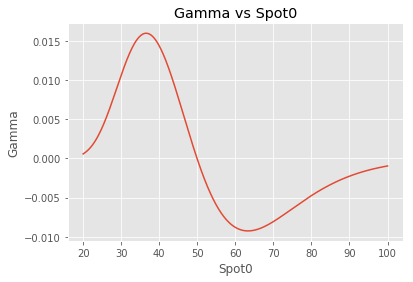

In [25]:
bull_call_gamma_plt = qbdp.Plotting(std_stgy_bullcall_engine,'gamma', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_gamma_plt.show()

Vega

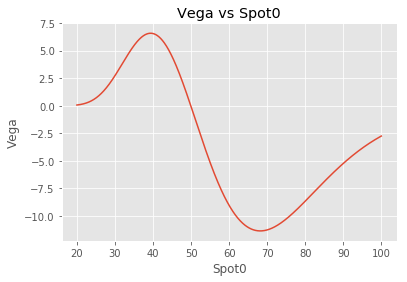

In [26]:
bull_call_vega_plt = qbdp.Plotting(std_stgy_bullcall_engine,'vega', x_axis_range=[20, 100], no_of_points=100).line_plot()
bull_call_vega_plt.show()

### Custom Strategies

In the last part of our tutorial we will see how we can define our own custom strategy by combining options.

Lets start with creating few of options.

In [42]:
eqOption1 = qbdp.EqOption(option_type='Call', strike=50, expiry_date='20180630', expiry_type='European')
eqOption2 = qbdp.EqOption(option_type='Call', strike=55, expiry_date='20180630', expiry_type='European')
eqOption3 = qbdp.EqOption(option_type='Put', strike=50, expiry_date='20180630', expiry_type='European')
eqOption4 = qbdp.EqOption(option_type='Call', strike=70, expiry_date='20180630', expiry_type='European')

Now we will combine them into strategy. We do have an option to add no. of units of each options.
For combining options into srtategy we need to create list of tuple containing options and thier correspinding units.

In [43]:
custom_option_port = [(eqOption3,1),(eqOption2, -1),(eqOption1, 1),(eqOption4, 2)]

Now we will use OptionStr1Udl objects from Quantsbin to create strategy using our variable custom_option_port

In [44]:
custom_stgy1 = qbdp.OptionStr1Udl(option_portfolio=custom_option_port)

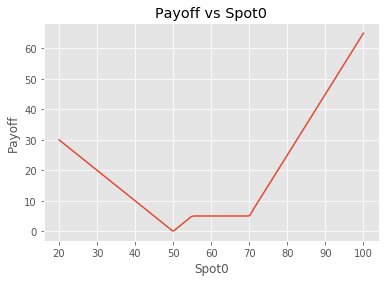

In [45]:
custom_stgy1_payoff_plt = qbdp.Plotting(custom_stgy1,'payoff', x_axis_range=[20, 100], no_of_points=100).line_plot()
custom_stgy1_payoff_plt.show()

**Interesting** right!! How easily Quantsbin nable us to visualize the payoff generated from combination of options.

In similar lines to what we discussed earlier we can generate all the graphs as well as greeks for this custom strategy.

### ThankYou for exploring Quantsbin

To explore more with **Quantsbin** please visit our official [documentation](http://quantsbin.com/documentation/) page.

In case of any issues with **Quantsbin** library please raise at [issue](https://github.com/quantsbin/Quantsbin/issues)

To collaborate with us visit [Quantsbin](http://quantsbin.com) official page or write to us as [contactus@quantsbin.com]. 